In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [48]:
#AUX functions
def proliferate(item, times):
    return [item for i in range(times)]
def filtered(list_to_filter, mask):
    import numpy as np
    l = np.array(list_to_filter)
    f = np.array(mask)
    return l[f]
def flatten_df(input_df):
    flat_dir = dict()
    for name, row in input_df.iterrows():
        #flat_dir.setdefault('Accumulated sampling (ns)', list()).extend([int(x) for x in row.keys()])
        mask = [x != 999 for x in row.values][:-1]+[False]
        flat_dir.setdefault('Accumulated sampling (ns)', list()).extend([int(x) for x in filtered(row.keys(), mask)])
        flat_dir.setdefault('Energy (kcal/mol)', list()).extend(filtered(list(row.values),mask))
        cluster, sampling_method, replica = (proliferate(item, len(row.values)) for item in name.split('-'))
        flat_dir.setdefault('Cluster', list()).extend(filtered(cluster,mask))
        flat_dir.setdefault('Sampling Method', list()).extend(filtered(sampling_method,mask))
        flat_dir.setdefault('Replica', list()).extend(filtered(replica, mask))
    return pd.DataFrame(flat_dir)
def row_plot_convergence(probe_names, data_frames):
    fig, ax = plt.subplots(1,len(probe_names), figsize=(15,5),  sharex=True)
    for i, data in enumerate(data_frames):
        sns.lineplot(y='Energy (kcal/mol)', x='Accumulated sampling (ns)', hue='Cluster', data=data, ax=ax[i], )
        ax[i].set_title(probe_names[i])
        #ax[i].set_ylim((min(data['Energy (kcal/mol)']),0))
    sns.despine()

# SOCS1 AlphaFold2

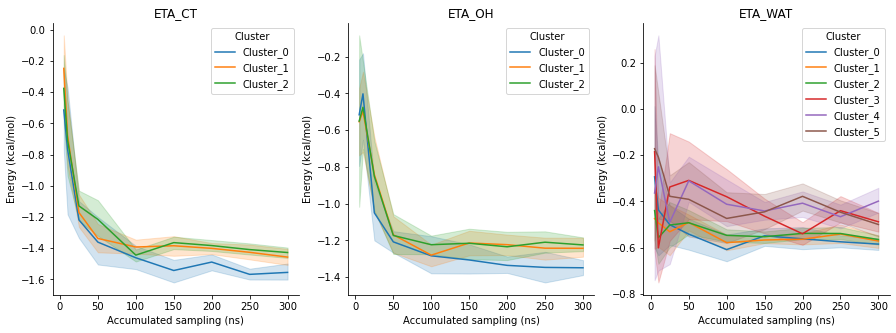

In [49]:
file_template = '../outputs/SOCS1_AF/SOCS1_AF_{probe}.csv'
probes = ['ETA_CT', 'ETA_OH', 'ETA_WAT']
data_frames = [flatten_df(pd.read_csv(file_template.format(probe = probe), index_col=0)) for probe in probes]
row_plot_convergence(probes, data_frames)

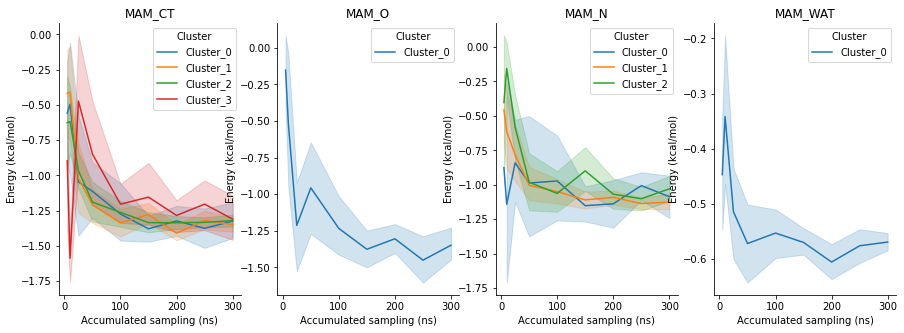

In [50]:
file_template = '../outputs/SOCS1_AF/SOCS1_AF_{probe}.csv'
probes = ['MAM_CT','MAM_O', 'MAM_N', 'MAM_WAT']
data_frames = [flatten_df(pd.read_csv(file_template.format(probe = probe), index_col=0)) for probe in probes]
row_plot_convergence(probes, data_frames)

# p62-ZZ 6KHZ

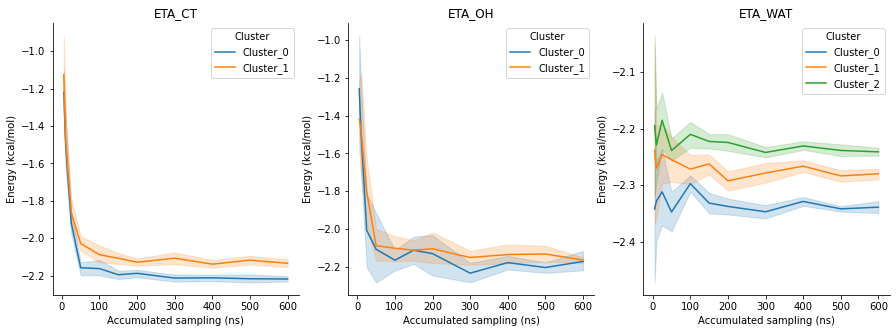

In [51]:
file_template = '../outputs/p62-ZZ_6KHZ/p62-ZZ_6KHZ_{probe}.csv'
probes = ['ETA_CT', 'ETA_OH', 'ETA_WAT']
data_frames = [flatten_df(pd.read_csv(file_template.format(probe = probe), index_col=0)) for probe in probes]
row_plot_convergence(probes, data_frames)

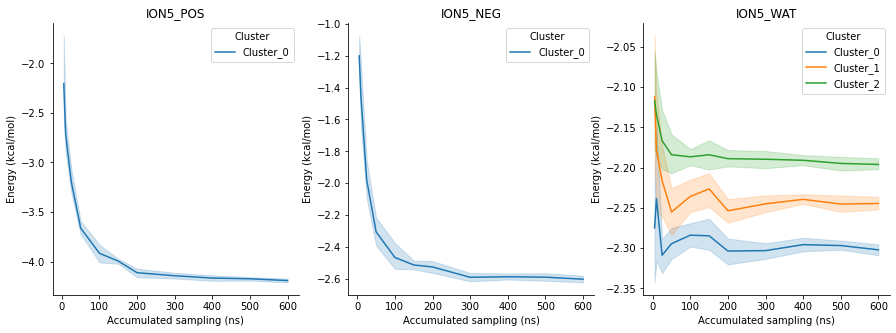

In [52]:
file_template = '../outputs/p62-ZZ_6KHZ/p62-ZZ_6KHZ_{probe}.csv'
probes = ['ION5_POS', 'ION5_NEG', 'ION5_WAT']
data_frames = [flatten_df(pd.read_csv(file_template.format(probe = probe), index_col=0)) for probe in probes]
row_plot_convergence(probes, data_frames)

# PFKFB3 6HVI

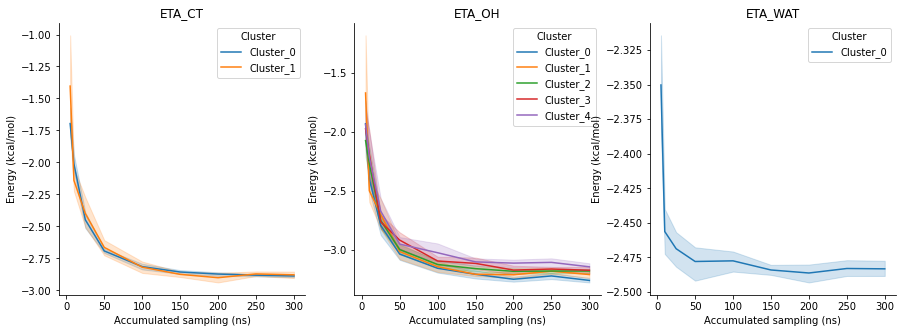

In [53]:
file_template = '../outputs/PFKFB3_6HVI/PFKFB3_6HVI_{probe}.csv'
probes = ['ETA_CT', 'ETA_OH', 'ETA_WAT']
data_frames = [flatten_df(pd.read_csv(file_template.format(probe = probe), index_col=0)) for probe in probes]
row_plot_convergence(probes, data_frames)

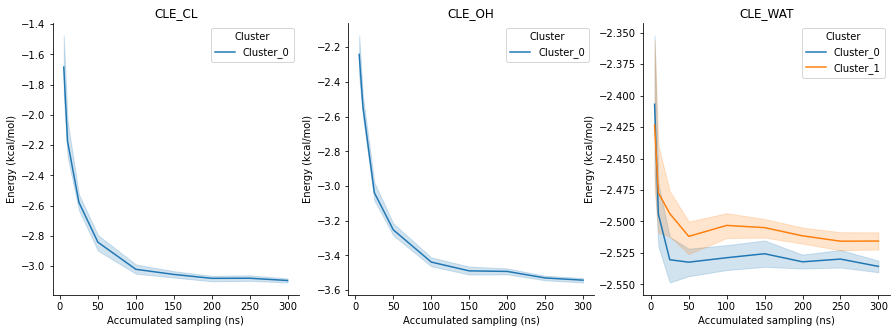

In [54]:
file_template = '../outputs/PFKFB3_6HVI/PFKFB3_6HVI_{probe}.csv'
probes = ['CLE_CL', 'CLE_OH', 'CLE_WAT']
data_frames = [flatten_df(pd.read_csv(file_template.format(probe = probe), index_col=0)) for probe in probes]
row_plot_convergence(probes, data_frames)

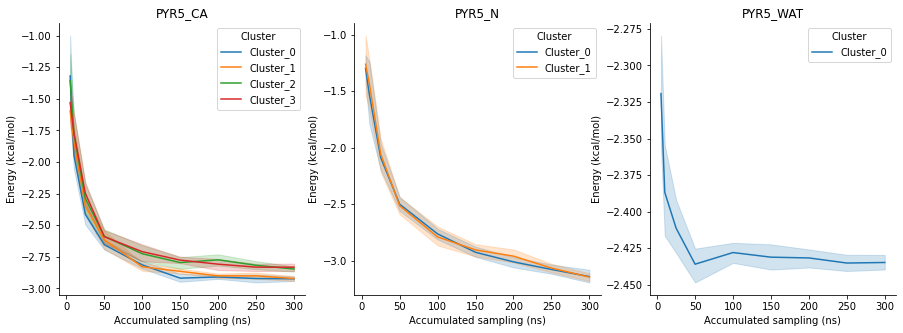

In [55]:
file_template = '../outputs/PFKFB3_6HVI/PFKFB3_6HVI_{probe}.csv'
probes = ['PYR5_CA', 'PYR5_N', 'PYR5_WAT']
data_frames = [flatten_df(pd.read_csv(file_template.format(probe = probe), index_col=0)) for probe in probes]
row_plot_convergence(probes, data_frames)